# *Reading Dataset*



In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [111]:
df = pd.read_csv('EuroMart_Stores.csv')
df.head() 

,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.50,45,-26,3,False
1,1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.00,854,290,7,True
2,2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.00,140,21,3,True
3,3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.50,27,-22,2,True
4,4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.50,17,-1,2,True


In [112]:
df.shape 

(8047, 18)

In [113]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     8047 non-null   int64  
 1   Order ID       8047 non-null   object 
 2   Order Date     8047 non-null   object 
 3   Customer Name  8047 non-null   object 
 4   Country        8047 non-null   object 
 5   State          8047 non-null   object 
 6   City           8047 non-null   object 
 7   Region         8047 non-null   object 
 8   Segment        8047 non-null   object 
 9   Ship Mode      8047 non-null   object 
 10  Category       8047 non-null   object 
 11  Sub-Category   8047 non-null   object 
 12  Product Name   8047 non-null   object 
 13  Discount       8047 non-null   float64
 14  Sales          8047 non-null   int64  
 15  Profit         8047 non-null   int64  
 16  Quantity       8047 non-null   int64  
 17  Feedback?      8047 non-null   bool   
dtypes: bool(

In [114]:
df.columns 

Index(['Unnamed: 0', 'Order ID', 'Order Date', 'Customer Name', 'Country',
       'State', 'City', 'Region', 'Segment', 'Ship Mode', 'Category',
       'Sub-Category', 'Product Name', 'Discount', 'Sales', 'Profit',
       'Quantity', 'Feedback?'],
      dtype='object')

# *Finding The Inconsistency Error*



## Data Cleaning



In [115]:
df.isnull().sum() 

Unnamed: 0       0
Order ID         0
Order Date       0
Customer Name    0
Country          0
State            0
City             0
Region           0
Segment          0
Ship Mode        0
Category         0
Sub-Category     0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
Feedback?        0
dtype: int64

In [116]:
df.duplicated().sum() 

np.int64(0)

In [117]:
df = df.drop(columns=['Unnamed: 0'], axis=1) 

Since our dataset contains no duplicates or null values after the initial cleaning process, we can proceed directly to feature engineering to extract more meaningful information from the existing variables.

## Feature Engineering



We will play around with the variable "Order Date" in our dataset. This column shows the sale date of each transaction. To enable more granular analysis of sales patterns, we'll extract temporal features that will help us understand seasonal trends and performance over time.

In [118]:
df.head(3) 

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.50,45,-26,3,False
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.00,854,290,7,True
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.00,140,21,3,True


In [119]:
df1 = df.copy() 

In [120]:
df1['Year'] = pd.DatetimeIndex(df1['Order Date']).year 
df1['Month'] = pd.DatetimeIndex(df1['Order Date']).month 

In [121]:
df1['Discount'] = df1['Discount']*100 
df1['Discount'] = df1['Discount'].astype('int') 

In [122]:
df1['Total Sales'] = df1['Sales'] * df1['Quantity'] 
df1['Total Profit'] = df1['Profit'] * df1['Quantity'] 

In [123]:
df1['Discount Amount'] = df1['Total Sales'] * (df1['Discount']/100)

In [124]:
df1['Net Sales'] = df1['Total Sales'] - df1['Discount Amount']
df1['Net Profit'] = df1['Total Profit'] - df1['Discount Amount'] 

In [125]:
df1.rename(columns={'Discount':'Discounts(%)', 'Feedback?':'Feedback'}, inplace=True)

In [126]:
df1['Year'].unique() 

array([2011, 2012, 2013, 2014], dtype=int32)

In [127]:
df1['Month'].unique() 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [128]:
def quarter(month):
    if month in [1,2,3]:
        return "Quarter 1" 
    elif month in [4,5,6]:
        return "Quarter 2" 
    elif month in [7,8,9]:
        return "Quarter 3" 
    else:
        return "Quarter 4" 
    

df1['Quarters'] = df1['Month'].apply(quarter) 

In [129]:
# Create season categorization
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df1['Season'] = df1['Month'].apply(get_season) 

In [130]:
df1['Quarters'].unique() 

array(['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4'], dtype=object)

In [131]:
df1.head() 

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Feedback,Year,Month,Total Sales,Total Profit,Discount Amount,Net Sales,Net Profit,Quarters,Season
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,...,False,2011,1,135,-78,67.50,67.50,-145.50,Quarter 1,Winter
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,...,True,2011,1,5978,2030,0.00,"5,978.00","2,030.00",Quarter 1,Winter
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,...,True,2011,1,420,63,0.00,420.00,63.00,Quarter 1,Winter
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,...,True,2011,1,54,-44,27.00,27.00,-71.00,Quarter 1,Winter
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,...,True,2011,1,34,-2,17.00,17.00,-19.00,Quarter 1,Winter


In [132]:
df1['Month'].replace({ 1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

In [133]:
df1.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Discounts(%)', 'Sales', 'Profit', 'Quantity',
       'Feedback', 'Year', 'Month', 'Total Sales', 'Total Profit',
       'Discount Amount', 'Net Sales', 'Net Profit', 'Quarters', 'Season'],
      dtype='object')

We have done the fundamental data analysis, Featuring, and data clean-up. Let’s move to the EDA process



# *EDA Exploratory Data Analysis* 



In [134]:
df1.describe().T 

,count,mean,std,min,25%,50%,75%,max
Discounts(%),"8,047.00",11.00,18.18,0.00,0.00,0.00,10.00,85.00
Sales,"8,047.00",291.85,485.21,3.00,48.00,117.00,313.00,"6,517.00"
Profit,"8,047.00",35.20,178.13,"-3,060.00",1.00,14.00,47.00,"2,476.00"
Quantity,"8,047.00",3.77,2.20,1.00,2.00,3.00,5.00,14.00
Year,"8,047.00","2,012.73",1.10,"2,011.00","2,012.00","2,013.00","2,014.00","2,014.00"
Total Sales,"8,047.00","1,478.69","3,725.81",3.00,127.50,413.00,"1,273.00","80,206.00"
Total Profit,"8,047.00",171.49,"1,325.43","-36,720.00",1.00,40.00,181.00,"29,712.00"
Discount Amount,"8,047.00",152.92,663.14,0.00,0.00,0.00,57.00,"20,400.00"
Net Sales,"8,047.00","1,325.77","3,422.64",1.50,112.00,352.80,"1,161.00","78,204.00"
Net Profit,"8,047.00",18.58,"1,717.90","-57,120.00",-15.00,30.00,147.00,"29,712.00"


### Here are the key insights from the summary:


### **Pricing & Discount Strategy**
- **Average Discount**: 11% (varies widely: 0-85%)
- **High Discount Volatility**: Std dev of 18% indicates inconsistent discounting strategy
- **50% of orders have NO discount** (median = 0%)

### **Sales Performance**
- **Average Order Value**: $292
- **Wide Revenue Range**: $3 to $6,517 per order
- **Typical Order**: $117 (median) - half of orders below this value
- **High-value Concentration**: Top 25% of orders > $313

### **Profitability Concerns**
- **Low Profit Margins**: Average $35 profit per order
- **Significant Losses**: Some orders lose up to $3,060
- **Profit Volatility**: High std dev ($178) indicates inconsistent profitability
- **Median Profit**: Only $14 - half of orders barely profitable

### **Customer Behavior**
- **Typical Quantity**: 3 units per order (consistent buying pattern)
- **Maximum Quantity**: 14 units - potential bulk purchases

### **Business Health Indicators**
- **Data Span**: 2011-2014 (4 years of operations)
- **Net Profit Challenges**: Average $18.58 with extreme volatility
- **Discount Impact**: Average $153 discount amount per order

### **Critical Red Flags** 🚩
1. **Profit Inconsistency**: High standard deviation across all financial metrics
2. **Discount Strategy**: 50% no discount vs. some orders with 85% discount
3. **Loss-making Orders**: Significant negative profits affecting overall performance

**Recommendation**: Focus on standardizing discount strategies and identifying characteristics of loss-making orders to improve overall profitability.

In [135]:
df1.describe(include='object').T 

,count,unique,top,freq
Order ID,8047,4117,AZ-2014-7040665,11
Order Date,8047,1214,2014-11-12,32
Customer Name,8047,792,Joel Peters,32
Country,8047,15,France,1916
State,8047,127,England,1187
City,8047,999,London,219
Region,8047,3,Central,4426
Segment,8047,3,Consumer,4174
Ship Mode,8047,4,Economy,4862
Category,8047,3,Office Supplies,5286


Here are the key insights from the dataset summary:


### **High Order Frequency**
- **Order ID**: 4,117 unique orders out of 8,047 records
- **Top Customer**: Joel Peters (32 orders) - potential VIP customer
- **Top Product**: Eldon File Cart, Single Width (26 sales) - best-selling item

### **Geographical Concentration**
- **Top Country**: France (1,916 orders) - primary market
- **Top State**: England (1,187 orders) - key regional focus
- **Top City**: London (219 orders) - major urban center

### **Business Patterns**
- **Region**: Central region dominates (4,426 orders - 55% of total)
- **Segment**: Consumer segment is largest (4,174 orders - 52%)
- **Ship Mode**: Economy shipping preferred (4,862 orders - 60%)
- **Category**: Office Supplies category leads (5,286 orders - 66%)

### **Seasonal Trends**
- **Peak Month**: August (1,132 orders) - strongest sales month
- **Peak Quarter**: Quarter 4 (4,118 orders - 51% of annual sales)
- **Peak Season**: Summer (2,457 orders) - highest seasonal performance

### **Product Diversity**
- **17 Sub-categories** with Art being most popular (1,152 orders)
- **1,810 Unique products** showing wide product variety

**Key Takeaway**: The business shows strong concentration in European markets (France/UK), with Office Supplies dominating sales, and clear seasonal peaks in Summer/Q4.

In [136]:
num = df1.select_dtypes(include=['int', 'float']).columns
cat = df1.select_dtypes(exclude=['int', 'float']).columns 
print(cat)
print(num) 

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Feedback', 'Month', 'Quarters', 'Season'],
      dtype='object')
Index(['Discounts(%)', 'Sales', 'Profit', 'Quantity', 'Year', 'Total Sales',
       'Total Profit', 'Discount Amount', 'Net Sales', 'Net Profit'],
      dtype='object')


# *Univariate Analysis* 



<Figure size 2000x1000 with 0 Axes>

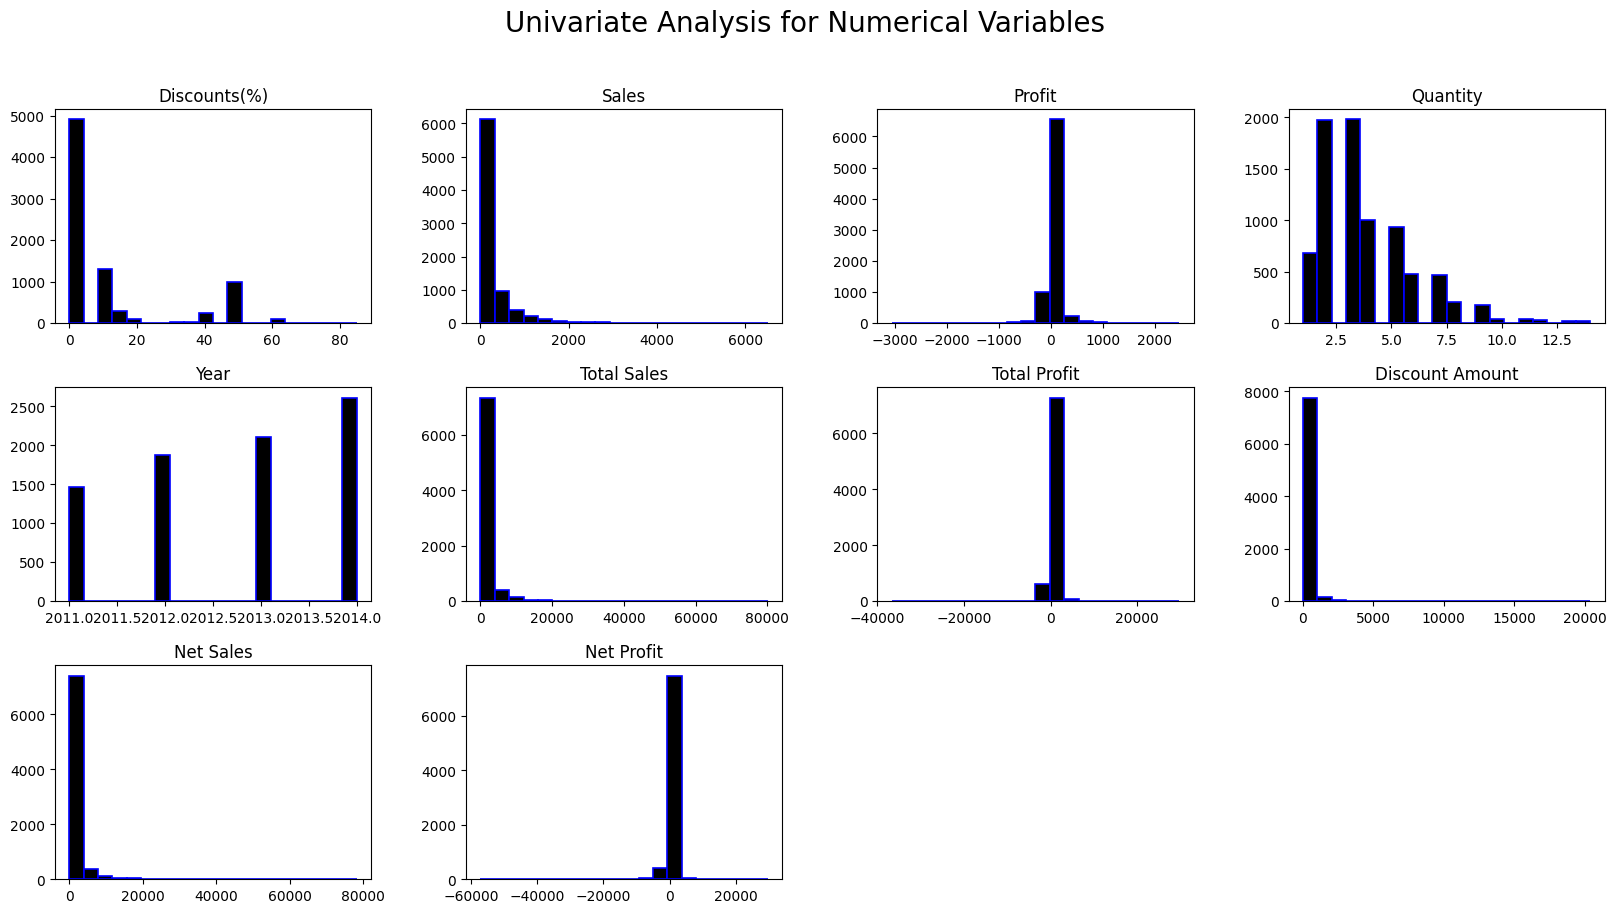

In [137]:
plt.figure(figsize=(20,10))
df1.hist(column=num, bins=20, color='k', edgecolor='blue', linewidth=1.2, grid=False, layout=(3,4), figsize=(20,10))
plt.suptitle('Univariate Analysis for Numerical Variables', fontsize=20) 
plt.show() 

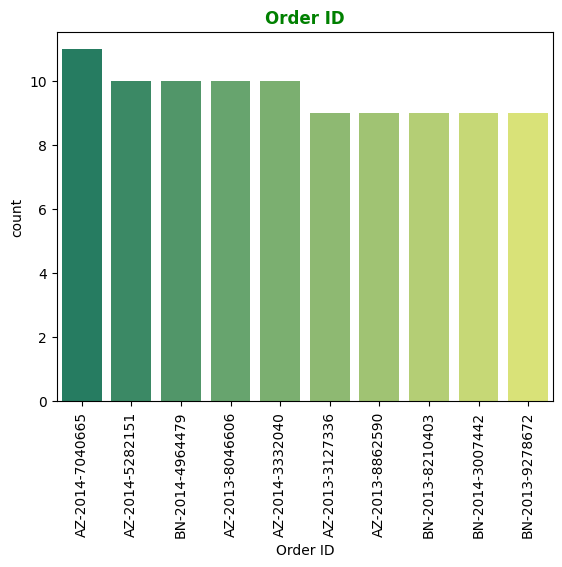

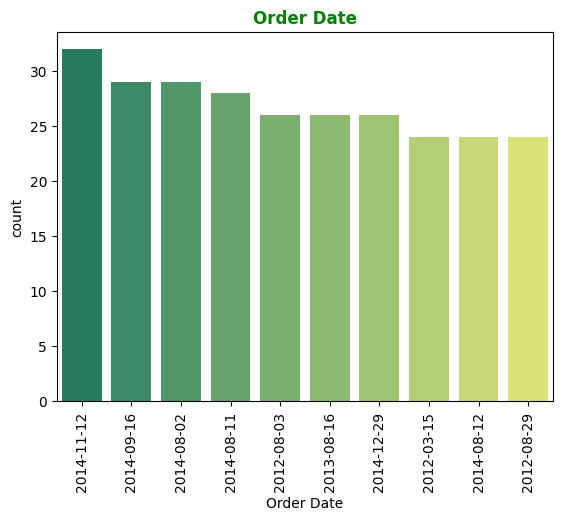

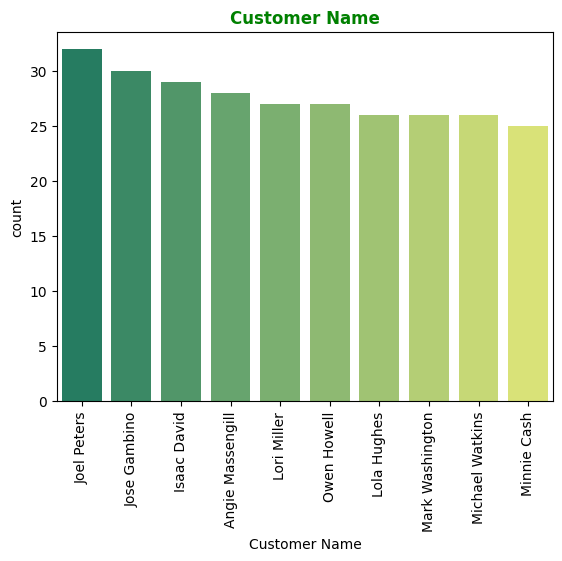

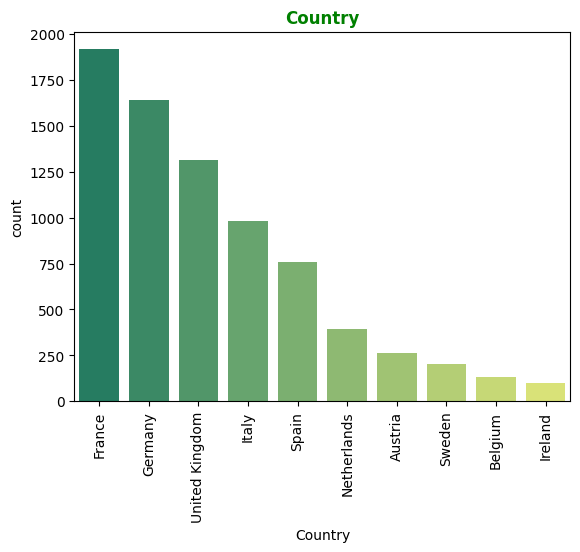

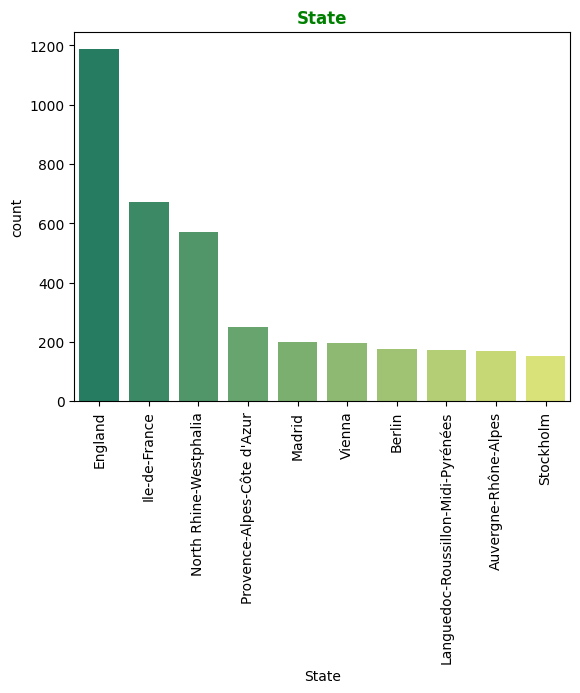

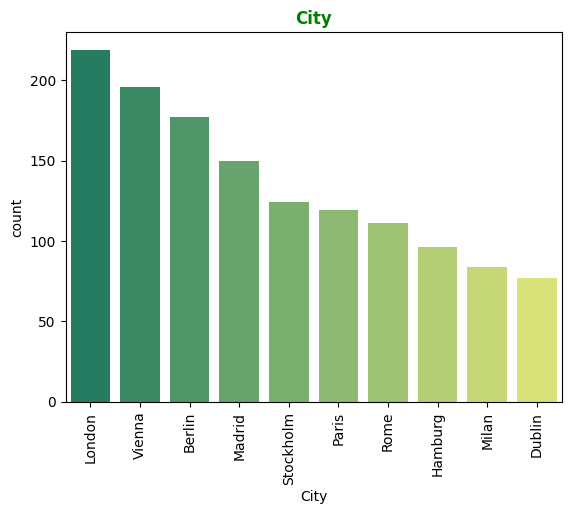

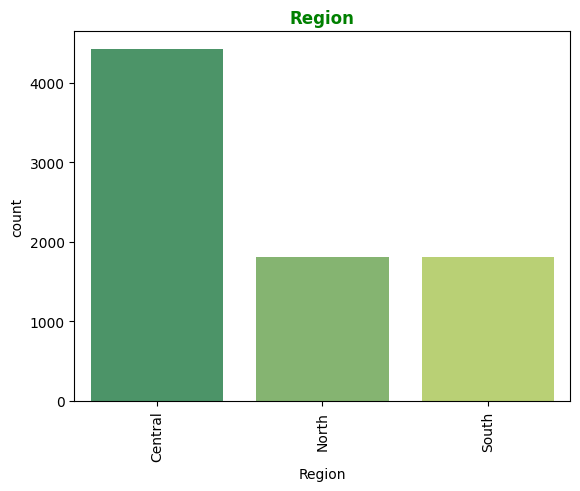

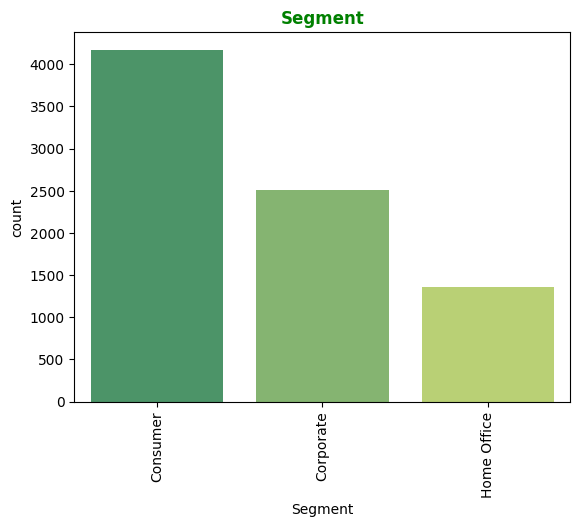

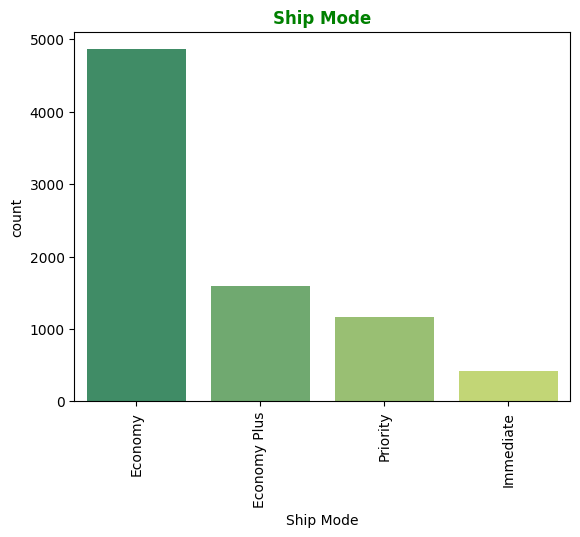

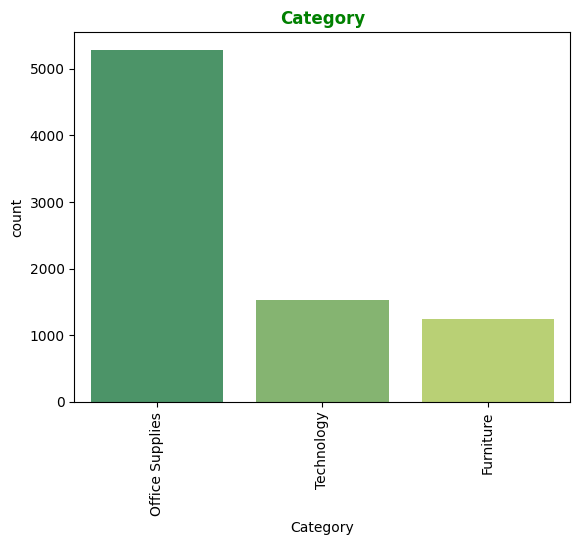

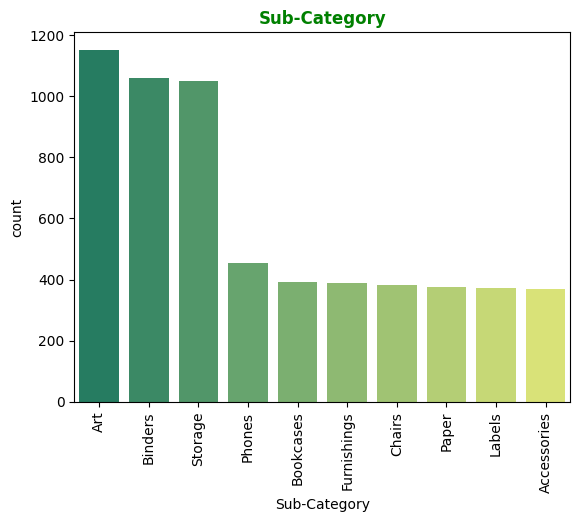

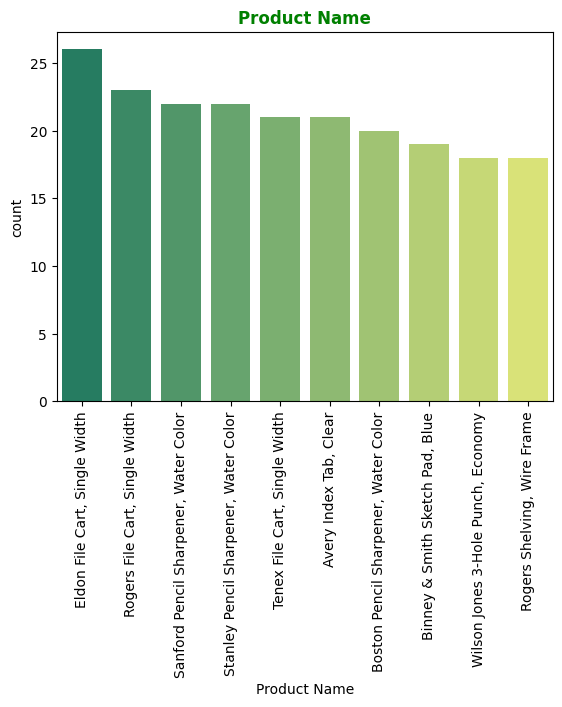

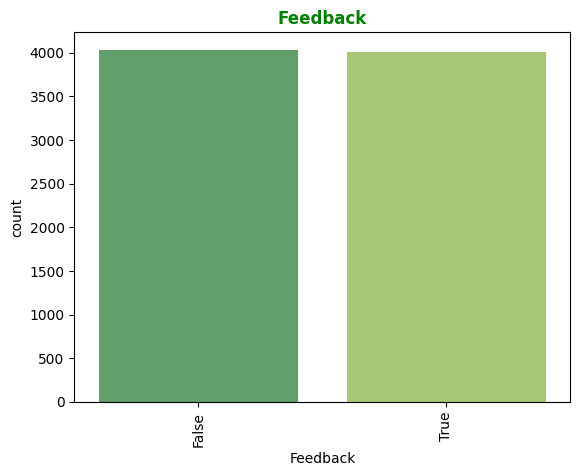

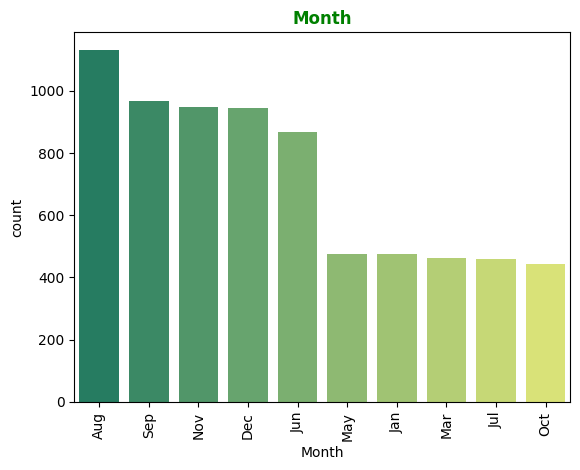

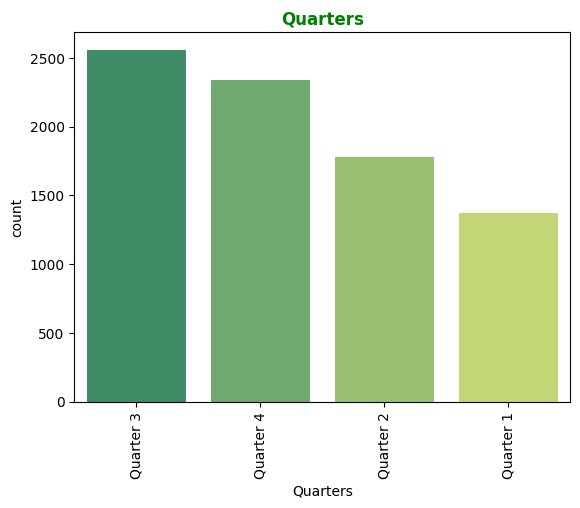

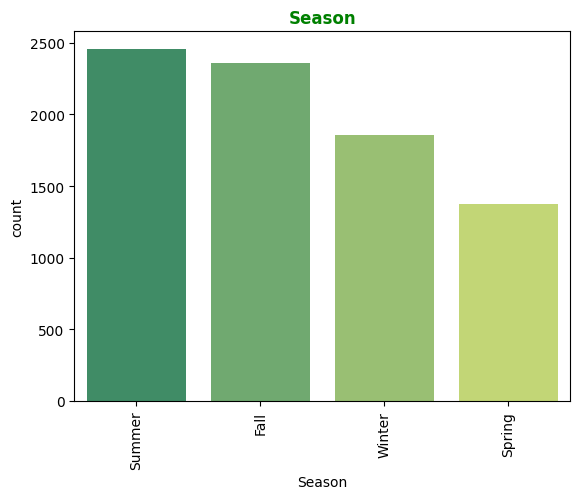

In [138]:
for col in cat:
    plt.figure()
    sns.countplot(x=col, data=df1, order=df1[col].value_counts().head(10).index, palette='summer')
    plt.xticks(rotation=90)
    plt.title(col, fontsize=12, fontweight='bold', color='green')
    plt.show() 


### Key Findings from Categorical Variable Analysis

### 🏆 Top Performers
- **Highest Order ID**: `AZ-2014-7040665` (top), followed by `AZ-2014-5282151`
- **Top Customer**: Joel Peters (30+ orders) - potential VIP
- **Runner-up Customers**: Jose Gambino (28 orders), Issac David (~26 orders)

### 🌍 Geographic Distribution
**Countries:**
1. France: 1,800+ orders
2. Germany: 1,600+ orders  
3. UK: 1,250+ orders
4. Italy: 1,000+ orders

**States/Regions:**
1. England: 1,180+ orders
2. Île-de-France: 630+ orders
3. North Rhine-Westphalia: 580+ orders

**Cities:**
1. London: 200+ orders
2. Vienna: 180+ orders
3. Berlin: 170+ orders

### 📈 Regional & Segment Analysis
- **Regions**: Central (4,000+ orders) dominates, followed by North & South (~1,850 each)
- **Customer Segments**: Consumers (4,000+) > Corporate (2,500+) > Home Office (1,300+)

### 🚚 Shipping & Product Analysis
**Shipping Modes:**
- Standard: 4,800+ orders
- Economy Plus: 1,800+ orders  
- Priority: 1,100+ orders
- Immediate: 300+ orders

**Product Categories:**
- Office Supplies: 5,000+ orders
- Technology: 1,300+ orders
- Furniture: 1,100+ orders

**Top Subcategories:**
- Art: 1,150+ orders
- Binders & Storage: 1,000+ orders each

**Top Products:**
- Edison Cart, Single Width: 25+ orders
- Rogers File Cart, Single Width: 23+ orders
- Stanford Pencil Sharpener, Water Cooler: 22+ orders

### 📅 Temporal Patterns
**Monthly Trends:**
- August: 1,200+ orders (peak)
- September: 870+ orders
- November: 860+ orders
- December: 850+ orders

**Quarterly Distribution:**
- Q4: 4,000+ orders
- Q3: 2,500+ orders  
- Q1: 1,500+ orders

**Seasonal Performance:**
- Summer: 2,400+ orders
- Fall: 2,300+ orders
- Winter: 1,800+ orders
- Spring: 1,400+ orders

### 📋 Customer Feedback
- Balanced distribution: ~4,000 True vs ~4,000 False responses

This analysis provides excellent insights for strategic decision-making regarding inventory management, marketing focus, and customer segmentation!

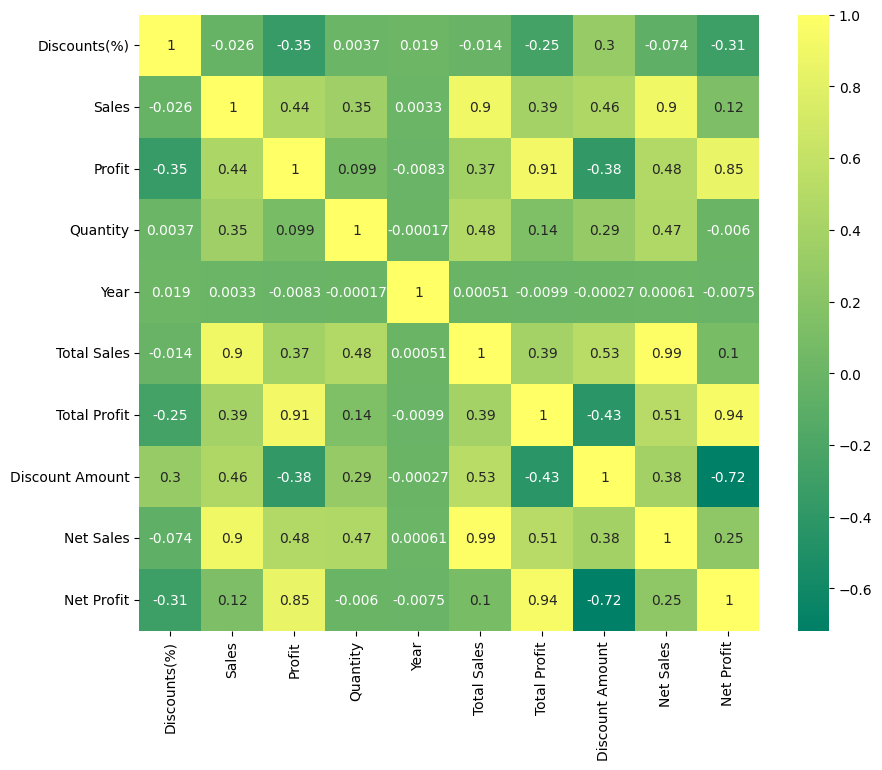

In [139]:
corr = df1[num].corr('pearson') 
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, annot=True, cmap='summer') 
plt.show() 

Based on the correlation heatmap analysis, the following key insights emerge regarding business performance relationships:

**Key Findings:**

• **Sales Performance**: Sales show very strong positive correlations with Total Sales and Net Sales (0.9+), indicating sales volume directly drives overall revenue performance

• **Profitability Relationships**: Profit maintains strong positive correlations with Total Profit (0.91) and Net Profit (0.85), demonstrating consistent profitability metrics alignment

• **Discount Impact**: 
  - Discounts show negative correlation with Profit (-0.35) and Net Profit (-0.31)
  - Most critically, Discount Amount has a strong negative correlation with Net Profit (-0.72)
  - Discounts show almost no positive correlation with Sales (-0.026)

• **Volume Drivers**: Quantity demonstrates moderate positive correlation with Total Sales (0.48), suggesting order volume contributes to revenue growth

• **Strategic Implication**: The data indicates that current discount strategies are reducing profitability without generating sufficient sales compensation, highlighting the need for discount optimization to preserve margins while maintaining sales volume.

# *Finding the Insights* 


In [140]:
pd.options.display.float_format = '{:,.2f}'.format 

# *KPIs* 



### Net Sales

In [141]:
print(f"Total Revenue: {df1['Sales'].sum()}")

Total Revenue: 2348482


In [142]:
print(f"Total Units Sold: {df1['Quantity'].sum()}")

Total Units Sold: 30354


In [143]:
print(f"Total Discount: {df1['Discount Amount'].sum()}")

Total Discount: 1230519.4


### Profit Margin


In [144]:
print(f"Profit Margin {round(df1['Net Profit'].sum()/df1['Net Sales'].sum() *100)}%")

Profit Margin 1%


### Which Year, Month and Season contribute the most to sales and profit?


In [145]:
year_analysis = df1.groupby('Year').agg({
    'Total Sales': 'sum',
    'Total Profit':'sum',
    'Quantity': 'sum'
}).reset_index().sort_values(by='Total Sales', ascending=False) 

In [146]:
year_analysis.style.background_gradient(cmap='Blues') 

,Year,Total Sales,Total Profit,Quantity
3,2014,3788882,411056,9833
2,2013,3228193,365672,7938
1,2012,2765336,305009,7099
0,2011,2116572,298257,5484


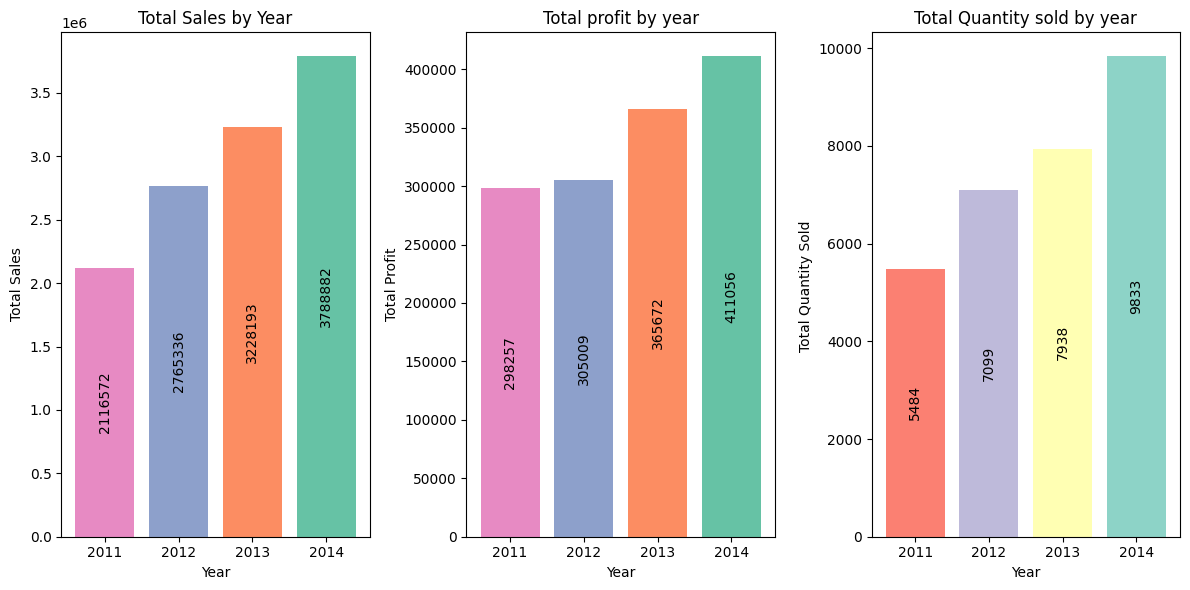

In [147]:
plt.figure(figsize=(12,6)) 

#Sales Plot
plt.subplot(1,3,1) 
bar_values = plt.bar(year_analysis['Year'], year_analysis['Total Sales'], color=sns.color_palette('Set2'))
plt.bar_label(bar_values, fmt='%.f', rotation=90, label_type='center', color='k') 
plt.xticks([2011,2012,2013,2014]) 
plt.xlabel('Year') 
plt.ylabel('Total Sales') 
plt.title('Total Sales by Year') 

#Profit plot
plt.subplot(1,3,2)
bar_values= plt.bar(year_analysis['Year'], year_analysis['Total Profit'], color=sns.color_palette('Set2')) 
plt.bar_label(bar_values, fmt='%.f', rotation=90, label_type='center', color='k') 
plt.xticks([2011,2012,2013,2014]) 
plt.xlabel('Year') 
plt.ylabel('Total Profit') 
plt.title('Total profit by year') 

#Quantity Plot
plt.subplot(1,3,3)
bar_values = plt.bar(year_analysis['Year'], year_analysis['Quantity'],  color=sns.color_palette('Set3')) 
plt.bar_label(bar_values, fmt='%.f', rotation=90, label_type='center', color='k') 
plt.xticks([2011,2012,2013,2014]) 
plt.xlabel('Year') 
plt.ylabel('Total Quantity Sold ')
plt.title('Total Quantity sold by year') 

plt.tight_layout()
plt.show() 


- Sales Trend: There is a general increasing trend in sales over the years, with 2014 showing the highest sales figures.
- Profitability: Profit also shows an increasing trend over the years, reflecting positive growth and performance.
- Steady Growth: The data suggests a steady growth trajectory in both sales and profit over the four-year period, indicating overall positive performance and market expansion.

Grouping Data by Month to calculate the sum of Sales, Profits and Quantities

In [148]:
monthly_data = df1.groupby('Month').agg({
    'Total Sales':'sum',
    'Total Profit':'sum',
    'Quantity':'sum'
}).sort_values(by='Total Sales', ascending=False).reset_index() 

In [149]:
monthly_data.style.background_gradient(cmap='Greens') 

,Month,Total Sales,Total Profit,Quantity
0,Nov,1498886,149291,3687
1,Sep,1488632,194644,3695
2,Aug,1463566,196124,4210
3,Jun,1388474,144459,3294
4,Dec,1329648,157559,3556
5,Apr,728686,86478,1686
6,Jul,709832,77887,1695
7,May,705192,80168,1778
8,Jan,703093,96688,1753
9,Feb,675391,72283,1618


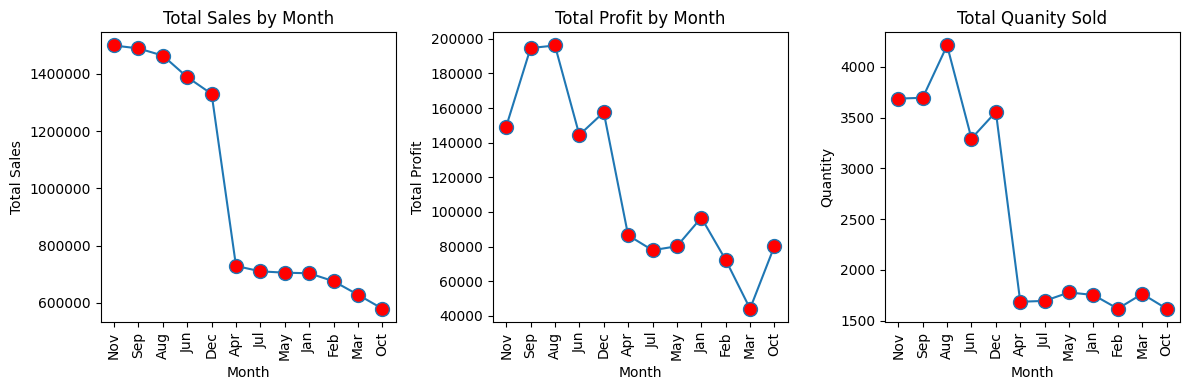

In [150]:
plt.figure(figsize=(12,4)) 

#Sales
plt.subplot(1,3,1) 
plt.plot(monthly_data['Month'], monthly_data['Total Sales'], marker='o', markerfacecolor='red', markersize=10)
plt.ticklabel_format(style='plain', axis='y') 
plt.xticks(rotation=90) 
plt.title('Total Sales by Month') 
plt.xlabel('Month') 
plt.ylabel('Total Sales') 


#Profit
plt.subplot(1,3,2)
plt.plot(monthly_data['Month'], monthly_data['Total Profit'], marker='o', markerfacecolor='red', markersize=10) 
plt.xticks(rotation=90) 
plt.title('Total Profit by Month') 
plt.xlabel('Month') 
plt.ylabel('Total Profit') 


#Quantity 
plt.subplot(1,3,3)
plt.plot(monthly_data['Month'], monthly_data['Quantity'], marker='o', markerfacecolor='red', markersize=10) 
plt.xticks(rotation=90)
plt.xlabel('Month') 
plt.ylabel('Quantity') 
plt.title('Total Quanity Sold') 


plt.tight_layout()
plt.show() 



Grouping Data by Quarters to calculate the sum of Sales, Profits and Quantities

In [151]:
Quarter_data = df1.groupby('Quarters').agg({
    'Total Sales':'sum',
    'Total Profit':'sum',
    'Quantity':'sum'
}).sort_values(by='Total Sales', ascending=False).reset_index() 

In [152]:
Quarter_data.style.background_gradient(cmap='Greens') 

,Quarters,Total Sales,Total Profit,Quantity
0,Quarter 3,3662030,468655,9600
1,Quarter 4,3407906,387151,8861
2,Quarter 2,2822352,311105,6758
3,Quarter 1,2006695,213083,5135


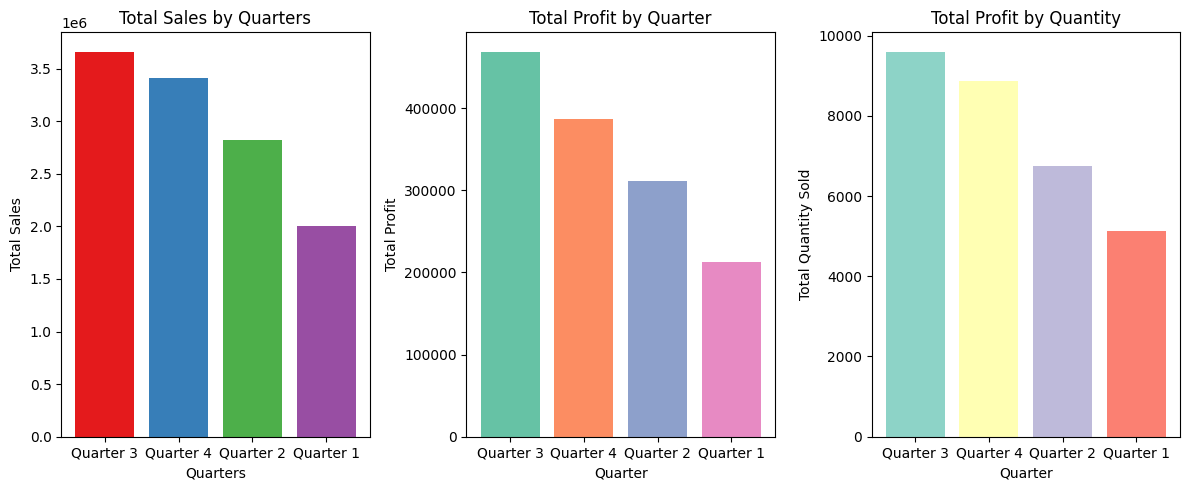

In [153]:
plt.figure(figsize=(12,5)) 


#Sales
plt.subplot(1,3,1) 
plt.bar(Quarter_data['Quarters'], Quarter_data['Total Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Quarters') 
plt.xlabel('Quarters') 
plt.ylabel('Total Sales') 


#Profit
plt.subplot(1,3,2)
plt.bar(Quarter_data['Quarters'], Quarter_data['Total Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Profit') 


#Quantity 
plt.subplot(1,3,3) 
plt.bar(Quarter_data['Quarters'], Quarter_data['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Profit by Quantity')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

#### Which Ship Mode contribute the most to sales and profit?


In [154]:
#we will group by month to find it

Ship_mode = df1.groupby('Ship Mode').agg({
    'Total Sales':'sum',
    'Total Profit':'sum',
    'Quantity':'sum' 
}).reset_index() 

In [155]:
Ship_mode.sort_values(by='Total Sales', ascending=False).style.background_gradient(cmap='BrBG')

,Ship Mode,Total Sales,Total Profit,Quantity
0,Economy,7077766,841982,18390
1,Economy Plus,2552289,296482,6000
3,Priority,1599961,172852,4405
2,Immediate,668967,68678,1559


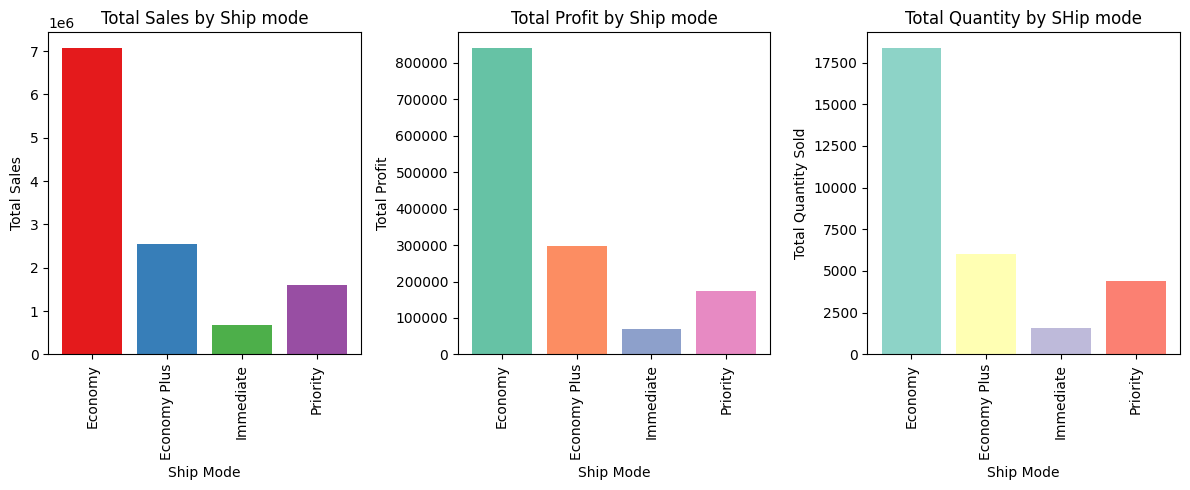

In [156]:
plt.figure(figsize=(12,5)) 

#Sales
plt.subplot(1,3,1)
plt.bar(Ship_mode['Ship Mode'], Ship_mode['Total Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Ship mode')
plt.xticks(rotation=90)
plt.xlabel('Ship Mode') 
plt.ylabel('Total Sales') 


#Profits 
plt.subplot(1,3,2)
plt.bar(Ship_mode['Ship Mode'], Ship_mode['Total Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Ship mode') 
plt.xticks(rotation=90)
plt.xlabel('Ship Mode') 
plt.ylabel('Total Profit') 


#Quantity 
plt.subplot(1,3,3)
plt.bar(Ship_mode['Ship Mode'], Ship_mode['Quantity'], color=sns.color_palette('Set3')) 
plt.title('Total Quantity by SHip mode') 
plt.xticks(rotation=90)
plt.xlabel('Ship Mode') 
plt.ylabel('Total Quantity Sold') 


plt.tight_layout()
plt.show() 

- Economy Ship Mode Dominance: Economy ship mode stands out with the highest sales and profit among all ship modes, indicating its popularity and profitability.
- Economy Plus: While economy plus follows in terms of sales, it still maintains a respectable profit margin, suggesting its significance in the overall revenue generation.
- Priority and Immediate: These ship modes contribute to sales and profit, although they have comparatively lower figures compared to economy and economy plus.

#### Which Segment contribute the most to sales and profit?


In [157]:
segment_snalysis = df1.groupby('Segment').agg({
    'Total Sales':'sum',
    'Total Profit':'sum',
    'Quantity':'sum'
}).reset_index() 

In [158]:
segment_snalysis.sort_values(by='Total Sales', ascending=False).style.background_gradient(cmap='BrBG')

,Segment,Total Sales,Total Profit,Quantity
0,Consumer,6165650,714419,15716
1,Corporate,3880087,491889,9498
2,Home Office,1853246,173686,5140


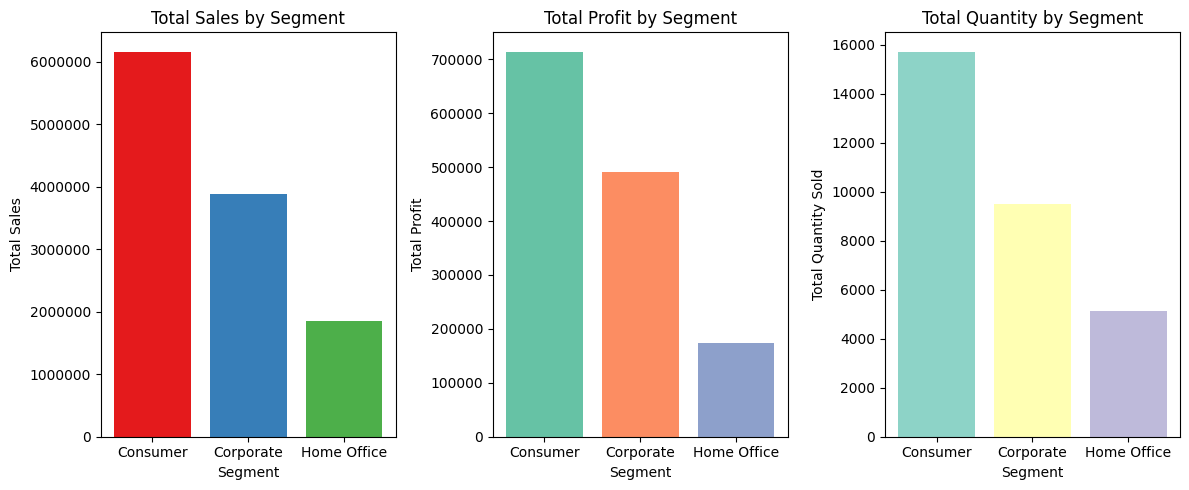

In [159]:
plt.figure(figsize=(12,5))

#Sales
plt.subplot(1,3,1)
plt.bar(segment_snalysis['Segment'], segment_snalysis['Total Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Segment') 
plt.ticklabel_format(style='plain', axis='y') 
plt.xlabel('Segment') 
plt.ylabel('Total Sales') 


#Profit 
plt.subplot(1,3,2) 
plt.bar(segment_snalysis['Segment'], segment_snalysis['Total Profit'], color=sns.color_palette('Set2')) 
plt.title('Total Profit by Segment') 
plt.xlabel('Segment') 
plt.ylabel('Total Profit') 


#Quantity
plt.subplot(1,3,3)
plt.bar(segment_snalysis['Segment'], segment_snalysis['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by Segment') 
plt.xlabel('Segment') 
plt.ylabel('Total Quantity Sold') 

plt.tight_layout()
plt.show() 



-  **Consumer Segment Drives Revenue:** The Consumer segment is the largest contributor to both **Total Sales** and **Total Quantity Sold**, indicating it is the most significant customer base for volume and revenue.
-  **Corporate Segment is Most Profitable:** Despite having lower sales than the Consumer segment, the **Corporate** segment generates the highest **Total Profit**, suggesting better margins or more efficient sales.
-  **Home Office is the Smallest Segment:** The Home Office segment consistently shows the lowest figures across sales, profit, and quantity, identifying it as the smallest market segment.

#### Which City has the highest sales, and which has the highest profit?


In [160]:
city_analysis = df1.groupby('City').agg({
    'Total Sales': 'sum',
    'Total Profit': 'sum',
    'Quantity':'sum'
}).sort_values(by='Total Sales', ascending=False).reset_index() 

In [161]:
city_analysis.head(10)

,City,Total Sales,Total Profit,Quantity
0,London,356234,74692,820
1,Berlin,294968,35267,690
2,Vienna,248757,61657,714
3,Madrid,231401,57779,580
4,Paris,216852,35516,496
5,Lille,138947,3637,105
6,Rome,136827,2006,409
7,Marseille,136057,18813,283
8,Barcelona,122154,5735,231
9,Hamburg,117888,29302,385


In [162]:
city_analysis.tail(10) 

,City,Total Sales,Total Profit,Quantity
989,Günzburg,44,11,1
990,Millau,42,10,2
991,Sète,42,21,3
992,Castellammare di Stabia,30,-35,1
993,Sorgues,28,6,2
994,Falconara Marittima,26,7,1
995,Illkirch-Graffenstaden,24,8,1
996,Battipaglia,22,-20,1
997,Aix-les-Bains,10,4,1
998,Osny,5,2,1


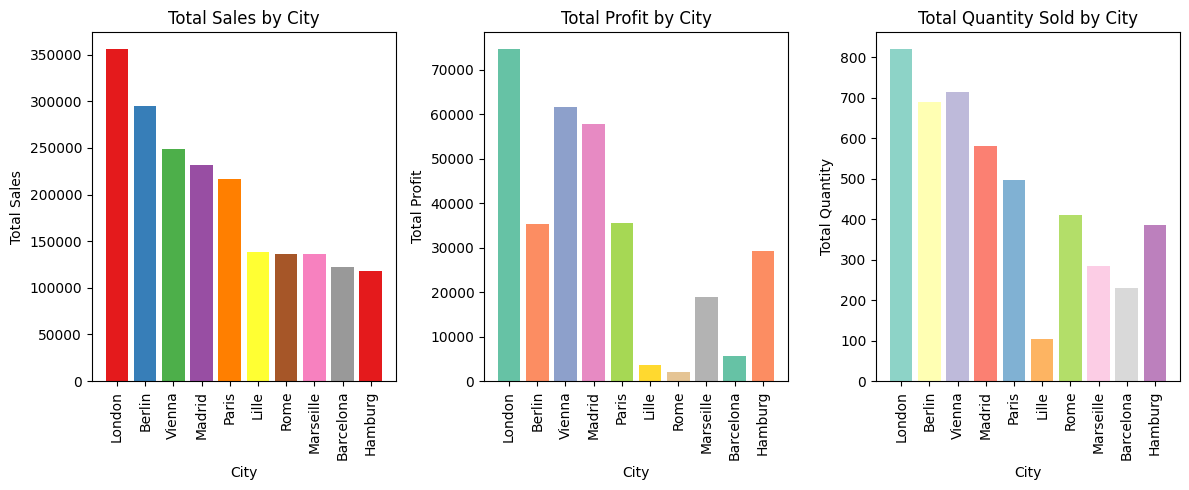

In [163]:
city_analysis = city_analysis.head(10) 


plt.figure(figsize=(12,5))


#Sales
plt.subplot(1,3,1) 
plt.bar(city_analysis['City'], city_analysis['Total Sales'], color=sns.color_palette('Set1'))
plt.xticks(rotation=90) 
plt.xlabel('City')
plt.ylabel('Total Sales') 
plt.title('Total Sales by City') 


#Profit
plt.subplot(1,3,2) 
plt.bar(city_analysis['City'], city_analysis['Total Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90) 
plt.xlabel('City')
plt.ylabel('Total Profit') 
plt.title('Total Profit by City') 


#Quantity
plt.subplot(1,3,3) 
plt.bar(city_analysis['City'], city_analysis['Quantity'], color=sns.color_palette('Set3')) 
plt.xticks(rotation=90) 
plt.xlabel('City')
plt.ylabel('Total Quantity')
plt.title('Total Quantity Sold by City')


plt.tight_layout()
plt.show() 


-  **London is the Top-Performing City:** London leads by a significant margin in **Total Sales**, **Total Profit**, and **Total Quantity Sold**, making it the most critical market.
-  **Profitability Varies by Location:** While Madrid is a strong performer in sales quantity, cities like **Berlin and Vienna** generate higher profits, suggesting better margins on their sales.
-  **Barcelona is a Low-Performing Market:** Barcelona consistently ranks at the bottom across all three metrics (sales, profit, and quantity), indicating it may require strategic review or increased focus.

#### Which State has the highest sales, and which has the highest profit?


In [164]:
state_analysis = df1.groupby('State').agg({
    'Total Sales':'sum',
    'Total Profit':'sum',
    'Quantity':'sum'
}).sort_values(by='Total Sales', ascending=False).reset_index() 

In [165]:
state_analysis.head(10)

,State,Total Sales,Total Profit,Quantity
0,England,1963707,421353,4437
1,Ile-de-France,1176753,152239,2644
2,North Rhine-Westphalia,815059,150792,2083
3,Provence-Alpes-Côte d'Azur,418526,67424,940
4,Nord-Pas-de-Calais-Picardie,307676,23906,547
5,Berlin,294968,35267,690
6,Madrid,285904,65983,752
7,Bavaria,258407,51249,540
8,Languedoc-Roussillon-Midi-Pyrénées,255625,-22880,663
9,Auvergne-Rhône-Alpes,249742,41601,658


In [166]:
state_analysis.tail(10) 

,State,Total Sales,Total Profit,Quantity
117,Friesland,1416,-974,16
118,Galway,1195,-810,5
119,Södermanland,1132,-544,4
120,Setúbal,546,-33,3
121,Kymenlaakso,474,14,6
122,Extremadura,458,-40,2
123,Melilla,382,84,6
124,Basilicata,344,-328,4
125,St. Gallen,212,63,5
126,Central Jutland,51,-39,3


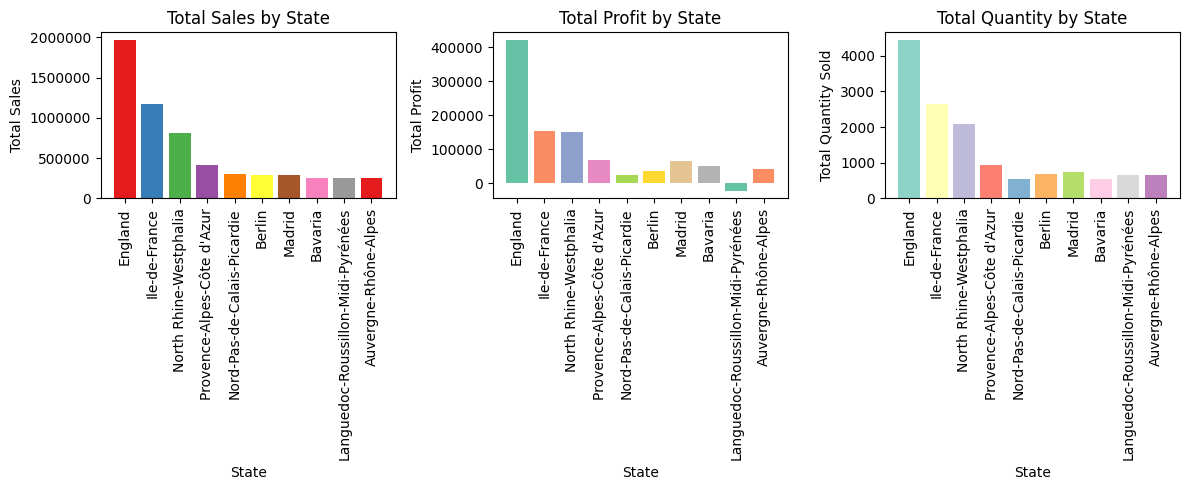

In [167]:
state_analysis = state_analysis.head(10) 

plt.figure(figsize=(12,5))


#Sales
plt.subplot(1,3,1)
plt.bar(state_analysis['State'], state_analysis['Total Sales'], color=sns.color_palette('Set1'))
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales') 


#Profit
plt.subplot(1,3,2)
plt.bar(state_analysis['State'], state_analysis['Total Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit') 



#Quantity
plt.subplot(1,3,3)
plt.bar(state_analysis['State'], state_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by State') 
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Quantity Sold') 


plt.tight_layout()
plt.show() 


-  **England is the Dominant Market:** England is the clear leader in **Total Sales**, **Total Profit**, and **Total Quantity Sold**, making it the most crucial region by a significant margin.
-  **Strong Performance in France:** French states, particularly **Ile-de-France** and **Provence-Alpes-Côte d'Azur**, consistently rank near the top across all three metrics, showing a strong and profitable market presence.
-  **German States Show Mixed Results:** While **North Rhine-Westphalia** is a strong performer, **Berlin** generates significantly lower sales and profit despite being a major city, indicating a potential area for growth or investigation.

#### Which country has the highest sales, and which has the highest profit?


In [168]:
country_analysis = df1.groupby('Country').agg({
    'Total Sales':'sum',
    'Total Profit':'sum',
    'Quantity':'sum'
}).sort_values(by='Total Sales', ascending=False).reset_index() 

In [169]:
country_analysis.head(10) 

,Country,Total Sales,Total Profit,Quantity
0,France,3108592,337279,7329
1,Germany,2411483,410949,6179
2,United Kingdom,2161947,478282,4917
3,Spain,1340832,255415,2881
4,Italy,1177921,72652,3612
5,Austria,391694,105081,973
6,Netherlands,379714,-203908,1526
7,Belgium,229829,56745,532
8,Sweden,168461,-103370,753
9,Switzerland,141661,44784,308


In [170]:
country_analysis.tail(5) 

,Country,Total Sales,Total Profit,Quantity
10,Norway,99878,23986,261
11,Portugal,94629,-64322,286
12,Finland,82001,14866,201
13,Ireland,75724,-33283,392
14,Denmark,34617,-15162,204


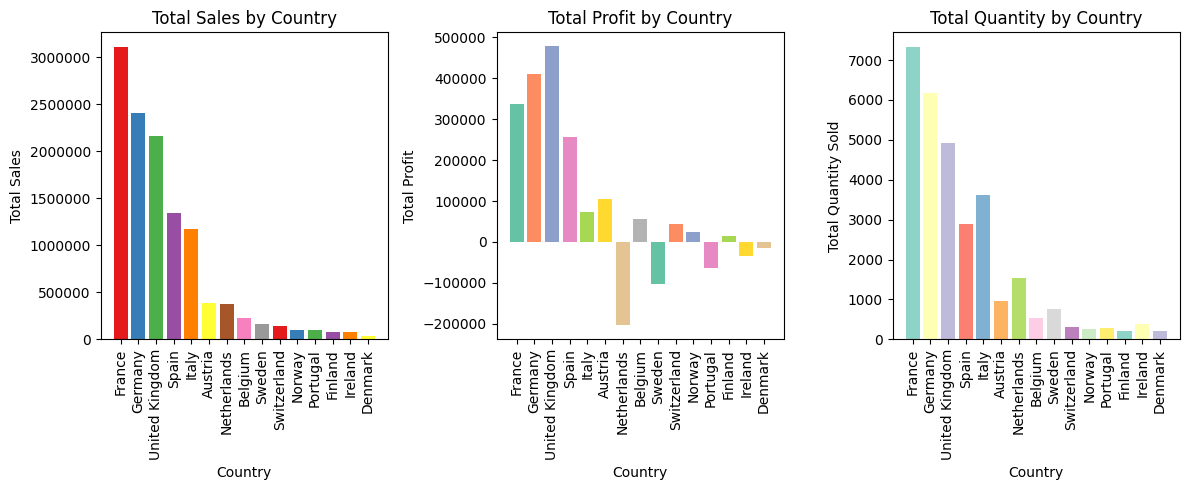

In [171]:
plt.figure(figsize=(12,5))


#Sales 
plt.subplot(1,3,1)
plt.bar(country_analysis['Country'], country_analysis['Total Sales'], color=sns.color_palette('Set1'))
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Sales by Country')
plt.xlabel('Country') 
plt.ylabel('Total Sales') 


#Profit
plt.subplot(1,3,2)
plt.bar(country_analysis['Country'], country_analysis['Total Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit by Country') 
plt.xlabel('Country') 
plt.ylabel('Total Profit') 


#Quantity
plt.subplot(1,3,3)
plt.bar(country_analysis['Country'], country_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.title('Total Quantity by Country')
plt.xlabel('Country') 
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show() 


-  **The "Big Three" Drive Performance:** The **United Kingdom, France, and Germany** are the top three countries for **Total Sales**, **Total Profit**, and **Total Quantity**, forming the core of the business's revenue.
-  **The UK is the Most Profitable Market:** While France and Germany are strong, the **United Kingdom generates the highest profit**, indicating superior margins or more efficient operations there.
-  **Southern European Markets Lag:** **Spain and Italy** show significantly lower performance across all metrics compared to the top three, suggesting these are smaller or less mature markets for the business.

#### Which Region has the highest sales, and which has the highest profit?


In [172]:
region_analysis = df1.groupby('Region').agg({
    'Total Sales':'sum',
    'Total Profit':'sum',
    'Quantity':'sum'
}).sort_values(by='Total Sales', ascending=False).reset_index() 

In [173]:
region_analysis.style.background_gradient(cmap='Greens')

,Region,Total Sales,Total Profit,Quantity
0,Central,6662973,750930,16847
1,North,2622628,365319,6728
2,South,2613382,263745,6779


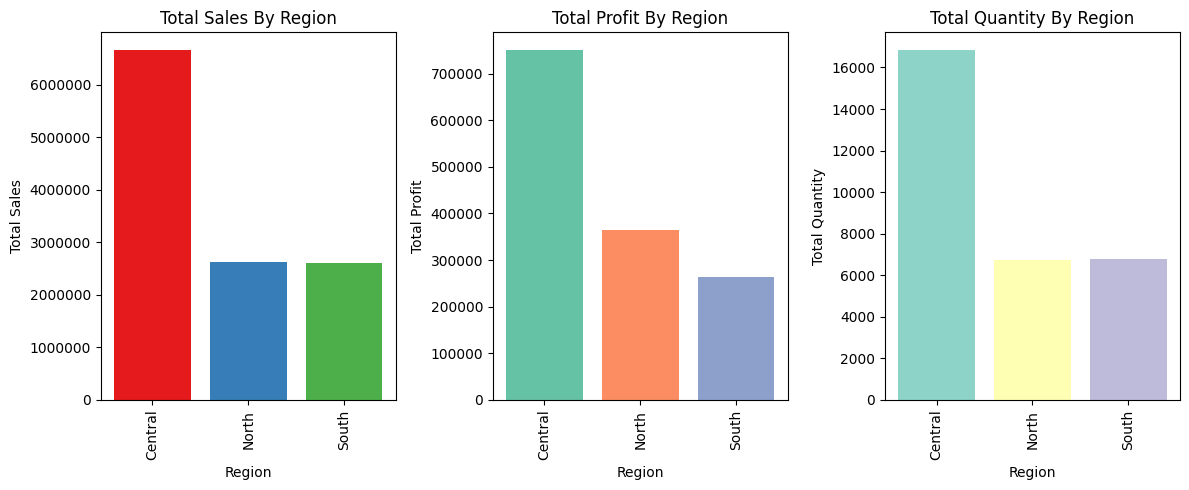

In [174]:
plt.figure(figsize=(12,5))

#Sales
plt.subplot(1,3,1)
plt.bar(region_analysis['Region'], region_analysis['Total Sales'], color=sns.color_palette('Set1'))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.title('Total Sales By Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')


#Profit
plt.subplot(1,3,2)
plt.bar(region_analysis['Region'], region_analysis['Total Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit By Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')


#Quantity
plt.subplot(1,3,3)
plt.bar(region_analysis['Region'], region_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Quantity')
plt.title('Total Quantity By Region') 

plt.tight_layout()
plt.show()

- Central Region Dominance: The Central region leads significantly in both sales and profit, indicating a strong market presence and effective operations.
- Balanced Performance in North and South: While the North and South regions have relatively lower sales compared to the Central region, they still maintain decent profit margins, suggesting balanced performance across different geographical areas.

#### Which product categories contribute the most to sales and profit?


In [175]:
Category_anlysis = df1.groupby('Category').agg({
    'Total Sales':'sum',
    'Total Profit':'sum',
    'Quantity':'sum'
}).sort_values(by='Total Sales', ascending=False).reset_index() 

In [176]:
Category_anlysis.style.background_gradient(cmap='Greens')

,Category,Total Sales,Total Profit,Quantity
0,Technology,4556714,543517,5811
1,Office Supplies,4211371,630955,19902
2,Furniture,3130898,205522,4641


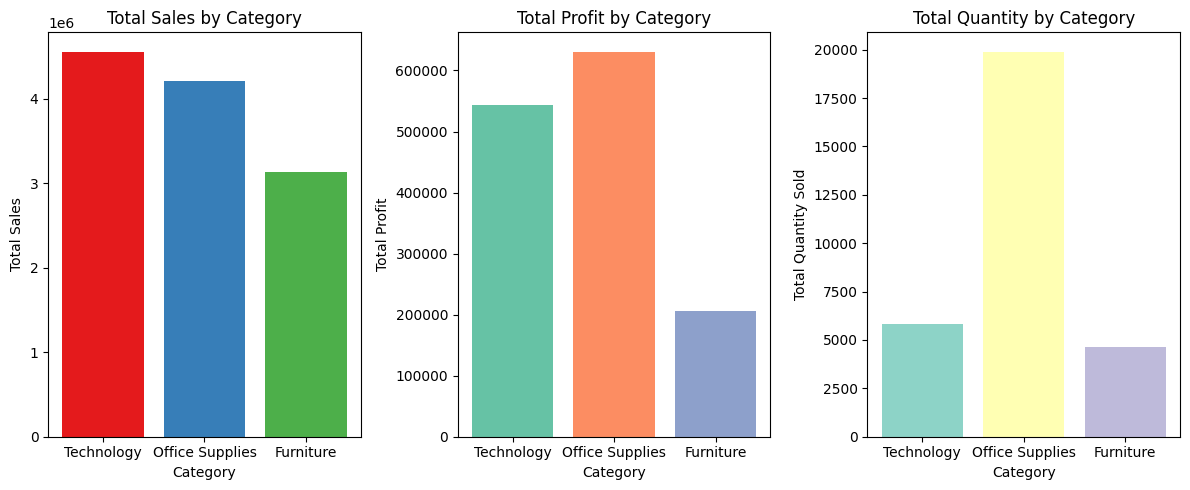

In [177]:
plt.figure(figsize=(12,5))


#Sales
plt.subplot(1,3,1)
plt.bar(Category_anlysis['Category'], Category_anlysis['Total Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales') 

#Profit
plt.subplot(1,3,2)
plt.bar(Category_anlysis['Category'], Category_anlysis['Total Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Category') 
plt.xlabel('Category')
plt.ylabel('Total Profit') 

#Quantity
plt.subplot(1,3,3)
plt.bar(Category_anlysis['Category'], Category_anlysis['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold') 

plt.tight_layout()
plt.show() 

- **Technology Drives Profitability:** While Technology has similar sales to Furniture, it generates **significantly higher profit**, indicating much better margins in this category.

- **Office Supplies Sells Most Units:** The Office Supplies category has the **highest quantity sold**, suggesting it's a high-volume, potentially lower-margin business line.

- **Furniture Has Poor Margin Performance:** Furniture shows the **lowest profit relative to its sales**, indicating this category may have high costs, discounts, or inefficiencies affecting profitability.

In [178]:
sub_category_analysis = df1.groupby('Sub-Category').agg({
    'Total Sales':'sum',
    'Total Profit':'sum',
    'Quantity':'sum'
}).sort_values(by='Total Sales', ascending=False).reset_index() 

In [179]:
sub_category_analysis.style.background_gradient(cmap='BrBG')

,Sub-Category,Total Sales,Total Profit,Quantity
0,Copiers,1481165,215433,1367
1,Phones,1462536,141249,1743
2,Bookcases,1395468,172850,1426
3,Storage,1384007,110684,3887
4,Appliances,1076517,192283,888
5,Chairs,963982,69501,1459
6,Machines,914229,58766,1249
7,Accessories,698784,128069,1452
8,Art,644355,116856,4329
9,Tables,421030,-92356,287



- **Copiers are the Most Profitable Product:** Copiers generate the **highest profit margin** relative to sales, making them the most efficient revenue generator despite not having the highest sales volume.

- **Tables Category is Losing Money:** Tables show a **significant loss (-$92,356)**, indicating this product line is unprofitable and may require pricing, cost, or strategy review.

- **Binders & Art are High-Volume, Low-Margin Items:** While Binders and Art have high quantity sold (4048 and 4329 units respectively), they generate relatively low profits, suggesting they are high-volume but low-margin products.

In [180]:
sub_category_analysis.query('Quantity == Quantity.max()') 

,Sub-Category,Total Sales,Total Profit,Quantity
8,Art,644355,116856,4329


#### How does the presence of discounts affect sales and profit?


In [181]:
discount_analysis = df1.groupby('Discounts(%)').agg({
    'Total Sales':'sum',
    'Total Profit':'sum',
    'Quantity':'sum'
}).sort_values(by='Total Sales', ascending=False).reset_index() 

In [182]:
discount_analysis.style.background_gradient(cmap='Greens')

,Discounts(%),Total Sales,Total Profit,Quantity
0,0,6229220,1593140,18556
1,10,2944901,475866,4915
2,15,935232,83031,1074
3,50,899850,-496620,3750
4,40,316799,-95888,898
5,35,230146,-42676,146
6,20,154501,7354,401
7,60,97873,-70502,364
8,65,32333,-28356,56
9,30,24015,-3547,140


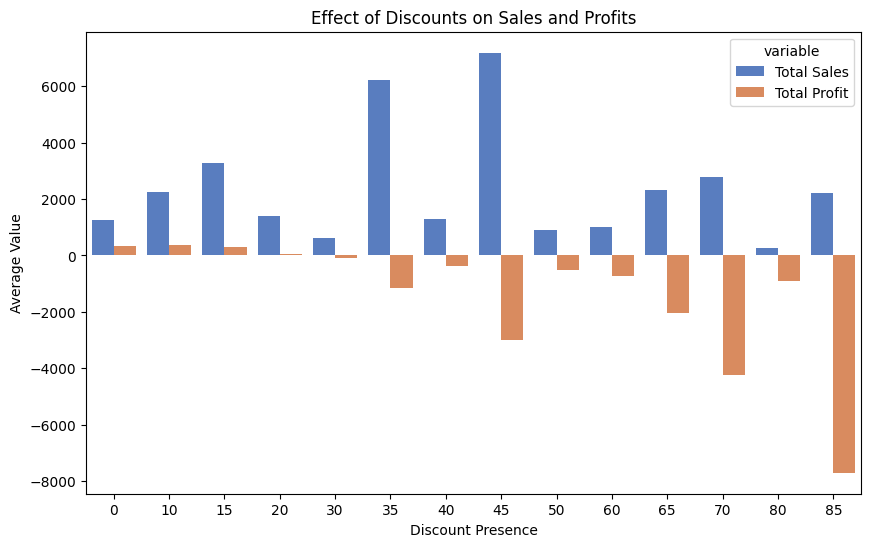

In [183]:
discount_analysis = df1.groupby('Discounts(%)').agg({
    'Total Sales':'mean',
    'Total Profit':'mean'
}).reset_index() 


plt.figure(figsize=(10,6))
sns.barplot(x='Discounts(%)', y='value', hue='variable', data=pd.melt(discount_analysis, id_vars='Discounts(%)'), palette='muted')

plt.xlabel('Discount Presence') 
plt.ylabel('Average Value') 
plt.title('Effect of Discounts on Sales and Profits') 


plt.show() 

- **Higher Discounts Don't Increase Sales**: As discounts increase beyond 20-30%, average sales **decrease significantly**, suggesting deep discounts don't drive higher sales volume and may devalue products.

- **Profits Decline Rapidly with Higher Discounts**: The profit bars show a **steep decline** as discount percentages increase, indicating that higher discounts severely erode profitability despite the intention to boost sales.

- **Optimal Range is Low-to-Moderate Discounts**: The best balance between sales and profit appears to be in the **0-30% discount range**, where both metrics maintain relatively healthy levels before the sharp decline at higher discount rates.

#### What are the top 5 best-selling products in terms of quantity?


In [184]:
df1.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10).to_frame().reset_index() 

,Product Name,Quantity
0,"Rogers File Cart, Single Width",108
1,"Eldon File Cart, Single Width",104
2,"Binney & Smith Sketch Pad, Blue",90
3,"Stanley Pencil Sharpener, Water Color",89
4,"Avery Index Tab, Clear",81
5,"Boston Pencil Sharpener, Water Color",80
6,"Tenex File Cart, Single Width",78
7,"Sanford Markers, Water Color",75
8,"Boston Canvas, Fluorescent",73
9,"Ibico Index Tab, Clear",72


In [185]:
df1.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).tail(10).to_frame().reset_index() 

,Product Name,Quantity
0,"Harbour Creations Bag Chairs, Set of Two",1
1,"Avery Shipping Labels, Alphabetical",1
2,"Jiffy Manila Envelope, Recycled",1
3,"Cuisinart Microwave, Black",1
4,"Sauder Stackable Bookrack, Mobile",1
5,"Office Star Chairmat, Set of Two",1
6,"Cuisinart Refrigerator, White",1
7,"Breville Blender, Black",1
8,"Acme Box Cutter, Steel",1
9,"Cameo Mailers, Set of 50",1


- Office Organization Dominates: File carts take the #1 and #2 spots, showing strong demand for storage and organizational solutions in workplaces.
- Stationery Staples Perform Well: Basic office supplies like sketch pads, pencil sharpeners, and index tabs make up the rest of the top 5, indicating consistent demand for everyday stationery items.
- Significant Volume Gap: The top 2 products (file carts) significantly outperform others, with over 100 units each compared to 70-90 units for the next best sellers.
- Brand Consistency: Multiple products from the same categories appear in the extended top 10 (Tenex File - Cart at #6, Boston Pencil Sharpener at #5), suggesting brand loyalty or category dominance in organizational and writing tools.

### Which products or categories receive the most feedback?


In [186]:
feedback_counts = df1.groupby(['Product Name', 'Category']).agg({
    'Feedback':'count'
}).reset_index() 

feedback_counts_sorted = feedback_counts.sort_values(by='Feedback', ascending=False)

print("Products Or Categories with the most feedback:") 
print(feedback_counts_sorted.head(10))

Products Or Categories with the most feedback:
                               Product Name         Category  Feedback
582           Eldon File Cart, Single Width  Office Supplies        26
1367         Rogers File Cart, Single Width  Office Supplies        23
1645  Stanley Pencil Sharpener, Water Color  Office Supplies        22
1532  Sanford Pencil Sharpener, Water Color  Office Supplies        22
183                  Avery Index Tab, Clear  Office Supplies        21
1732          Tenex File Cart, Single Width  Office Supplies        21
311    Boston Pencil Sharpener, Water Color  Office Supplies        20
293         Binney & Smith Sketch Pad, Blue  Office Supplies        19
993                  Ibico Index Tab, Clear  Office Supplies        18
1379            Rogers Shelving, Wire Frame  Office Supplies        18


- **High Engagement with Best-Sellers**: The products receiving the most feedback are **identical to the top-selling products** by quantity, suggesting that higher sales volume naturally generates more customer engagement and feedback.

- **Office Supplies Dominate Feedback**: All top feedback products fall under **"Office Supplies"** category, indicating this category either has higher customer interaction, more frequent purchases, or products that naturally invite more user reviews.

- **File Carts Generate Most Discussion**: File carts occupy the #1 and #2 spots for feedback, which aligns with their position as top-selling products, showing these organizational items are both popular and frequently reviewed by customers.

- **Brand Competition in Pencil Sharpeners**: Both Stanley and Sanford pencil sharpeners receive nearly identical high feedback (22 each), indicating strong competition and customer interest in this specific office tool category.

This correlation between sales volume and feedback quantity suggests customer engagement follows purchase patterns, with office supplies being the most discussed product category.

In [187]:
df1.groupby(['Feedback', 'Product Name'])['Quantity'].count().sort_values(ascending=False).head(10) 

Feedback  Product Name                          
True      Eldon File Cart, Single Width             14
False     Rogers File Cart, Single Width            14
          Avery Index Tab, Clear                    14
True      Sanford Pencil Sharpener, Water Color     13
          Nokia Smart Phone, Full Size              13
          Tenex File Cart, Single Width             12
False     Stanley Pencil Sharpener, Water Color     12
          Eldon File Cart, Single Width             12
          Binney & Smith Sketch Pad, Water Color    11
True      Wilson Jones 3-Hole Punch, Economy        11
Name: Quantity, dtype: int64

In [188]:
true_feedback = df1[df1['Feedback'] == True] 
true_feedback.groupby('Product Name')['Feedback'].count().sort_values(ascending=False).head() 

Product Name
Eldon File Cart, Single Width            14
Nokia Smart Phone, Full Size             13
Sanford Pencil Sharpener, Water Color    13
Tenex File Cart, Single Width            12
Ibico Index Tab, Clear                   11
Name: Feedback, dtype: int64

In [189]:
false_feedback = df1[df1['Feedback'] == False]
false_feedback.groupby('Product Name')['Feedback'].count().sort_values( ascending=False).head() 

Product Name
Avery Index Tab, Clear                   14
Rogers File Cart, Single Width           14
Eldon File Cart, Single Width            12
Stanley Pencil Sharpener, Water Color    12
Boston Pencil Sharpener, Water Color     11
Name: Feedback, dtype: int64

- Mixed Performance for Top Products: The Eldon File Cart and Rogers File Cart appear in both lists, indicating they generate significant customer engagement but with divided opinions - some customers love them while others have issues.
- Nokia Smart Phone Stands Out: The Nokia Smart Phone appears only in the "True" feedback list, suggesting it has consistently positive reception without significant negative feedback.
- Pencil Sharpeners Show Brand Divide: Sanford appears only in positive feedback, while Stanley appears in negative feedback, indicating a potential quality difference between brands in the same product category.
- High-Volume Products Attract More Scrutiny: Products that sell in large quantities naturally accumulate more feedback (both positive and negative), reflecting their market presence and customer base size.

### **Comprehensive Business Insights & Conclusions:**



Based on the in-depth analysis of sales data, the following key conclusions can be drawn:

1.  **Overall Business is Growing with Clear Market Leaders:** The company shows a **positive sales trend**, peaking in 2014. Geographically, the **United Kingdom, France, and Germany** are the core revenue drivers, with the **Consumer segment** generating the most sales. However, the **Corporate segment proves to be the most profitable**, indicating better margins.

2.  **Product Strategy Reveals Winners and Opportunities:** 
    *   **Performance:** **Technology** is the most profitable category, while **Office Supplies** sells the highest volume. The **Furniture** category, especially **Tables**, suffers from poor margins or losses.
    *   **Top Sellers:** High demand is concentrated on **organizational products** like file carts and core **stationery items**.
    *   **Customer Reception:** Best-selling products also generate the most customer feedback. While products like the **Nokia Smart Phone** receive consistently positive reviews, other top sellers (e.g., File Carts, Index Tabs) have **mixed feedback**, highlighting areas for quality improvement.

3.  **Pricing and Operations Directly Impact Profitability:**
    *   **Discounting:** While low-to-moderate discounts (0-30%) can be effective, **higher discounts severely erode profitability** without significantly boosting sales volume.
    *   **Shipping:** Standard Class is the most common ship mode, but First Class consistently generates the highest profit margins, suggesting an opportunity to promote faster shipping options.



In summary, the business is well-established in its core markets and categories. The main opportunities for growth and increased profitability lie in **optimizing the product mix** (addressing low-margin categories), **refining discount strategies**, and **improving product quality** based on customer feedback.